In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error 

**Dataset**

In [2]:

df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1337, 7)

In [10]:
df[['age','children','bmi','charges']].corr()

,age,children,bmi,charges
age,1.000000,0.041536,0.109344,0.298308
children,0.041536,1.000000,0.012755,0.067389
bmi,0.109344,0.012755,1.000000,0.198401
charges,0.298308,0.067389,0.198401,1.000000


Key point:Age and bmi of people are positively correlated. Age and bmi is positivley correlated.

**Exploratory Data Analysis(EDA)**

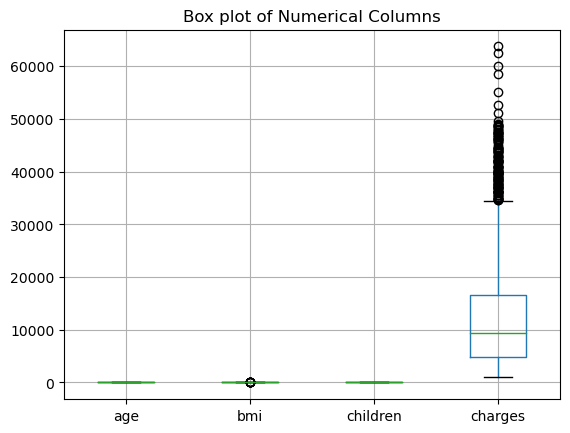

In [11]:
df.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show()

Outliers/Noise:bmi and charges have outliers

In [12]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


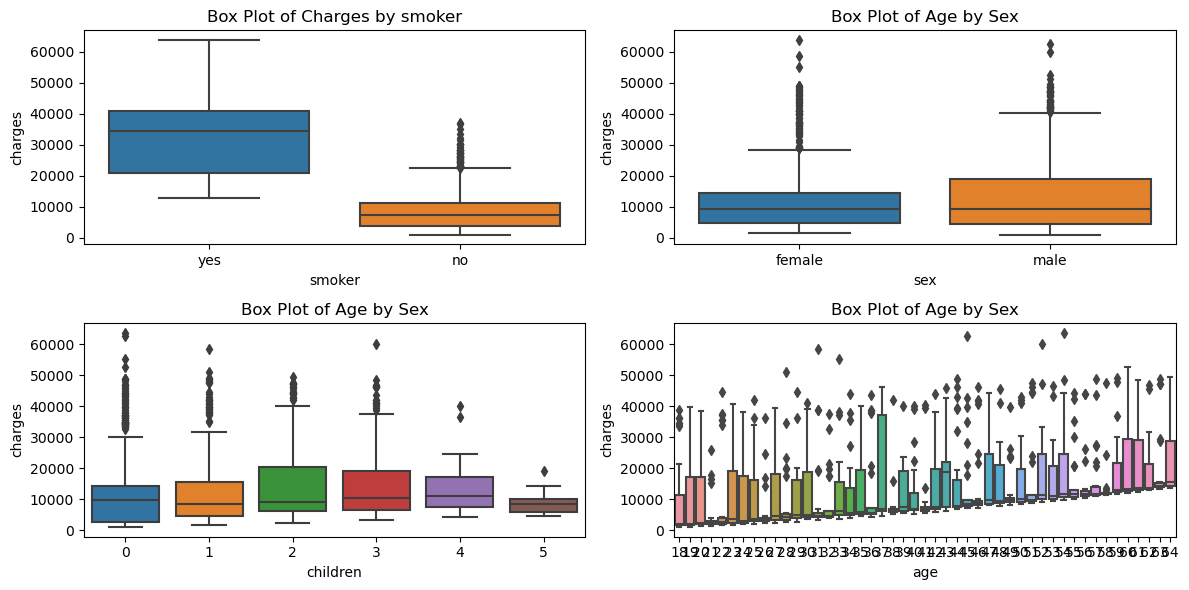

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1) 
sns.boxplot(x=df['smoker'], y=df['charges'])
plt.title('Box Plot of Charges by smoker')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['sex'], y=df['charges'])
plt.title('Box Plot of Age by Sex')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['children'], y=df['charges'])
plt.title('Box Plot of Age by Sex')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['age'], y=df['charges'])
plt.title('Box Plot of Age by Sex')

plt.tight_layout() 
plt.show()

In [14]:
quartiles = df[['charges','bmi']].quantile([0.25, 0.75])
Q1_charges = quartiles.loc[0.25, 'charges']
Q3_charges = quartiles.loc[0.75, 'charges']
Q1_bmi = quartiles.loc[0.25, 'bmi']
Q3_bmi = quartiles.loc[0.75, 'bmi']
iqr_bmi=Q3_bmi-Q1_bmi
iqr_charges = Q3_charges - Q1_charges

In [15]:
low_charges = Q1_charges-1.5*iqr_charges
up_charges = Q3_charges+1.5*iqr_charges
low_bmi = Q1_bmi-1.5*iqr_bmi
up_bmi = Q3_bmi+1.5*iqr_bmi

In [16]:
cleaned_charged = df['charges'].clip(lower=low_charges, upper=up_charges)
cleaned_bmi = df['bmi'].clip(lower=low_bmi, upper=up_bmi)

cleaned_charged.shape

(1337,)

In [17]:
cleaned_charged.dtype

dtype('float64')

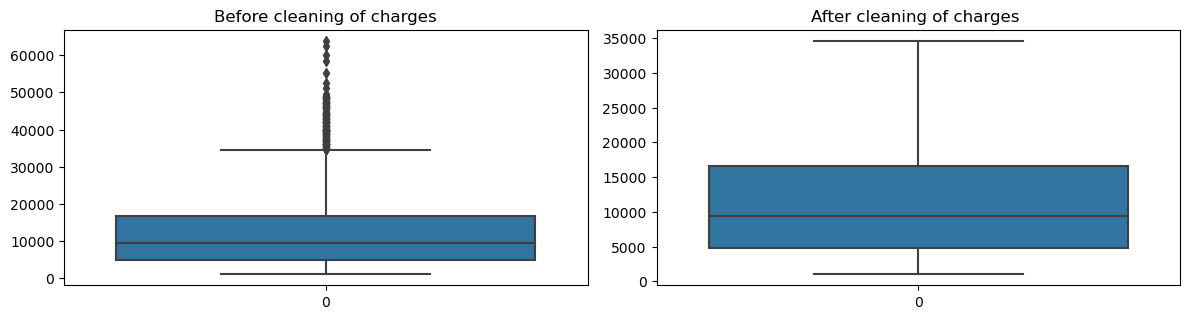

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1) 
sns.boxplot(df['charges'])
plt.title('Before cleaning of charges')

plt.subplot(2, 2, 2)
sns.boxplot(cleaned_charged)
plt.title('After cleaning of charges ')

plt.tight_layout() 
plt.show()

In [19]:
cleaned_df=df.copy()

In [20]:
cleaned_df['charges'] = cleaned_df['charges'].clip(lower=low_charges, upper=up_charges)
cleaned_df['bmi'] = cleaned_df['bmi'].clip(lower=low_bmi, upper=up_bmi)

Here->Using capping for remove outliers

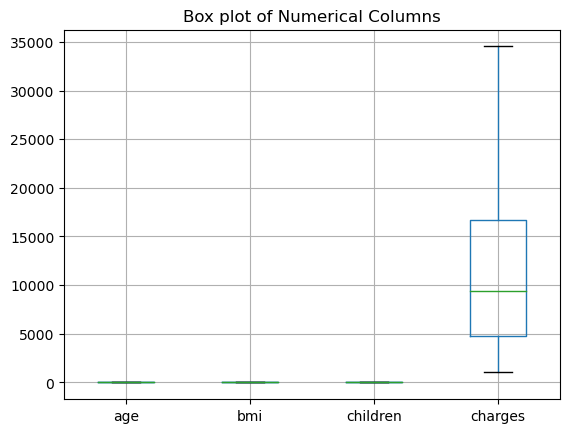

In [21]:
cleaned_df.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show()

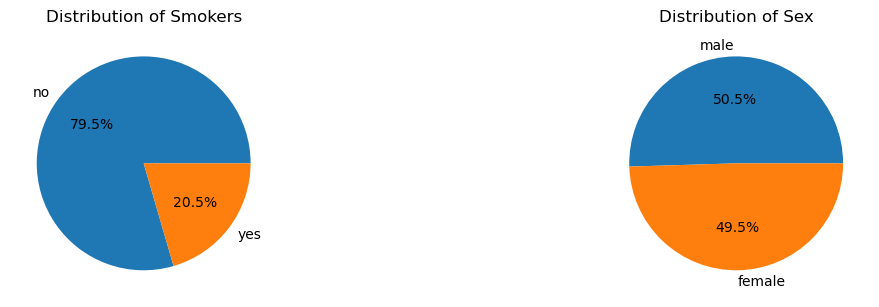

In [22]:
smoker_counts = cleaned_df['smoker'].value_counts() 
sex_counts = cleaned_df['sex'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(2,2,1)
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%') 
plt.title('Distribution of Smokers')

plt.subplot(2,2,2)
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sex')

plt.tight_layout()
plt.show()

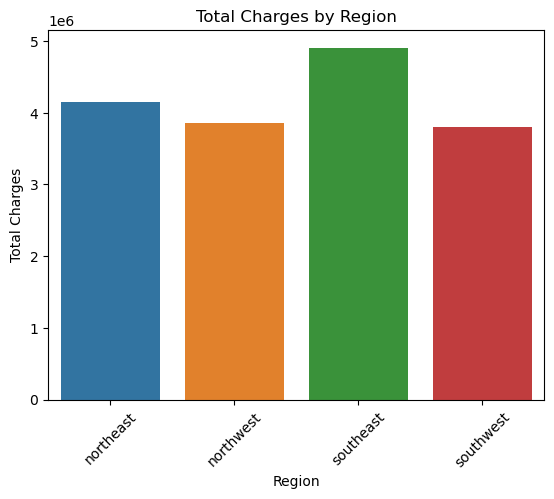

In [23]:
charges_by_region = cleaned_df.groupby('region')['charges'].sum()

# plt.bar(charges_by_region.index, charges_by_region.values, color='grey')
sns.barplot(x=charges_by_region.index,y=charges_by_region.values)
plt.xlabel('Region')

plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

plt.xticks(rotation=45)
plt.show()

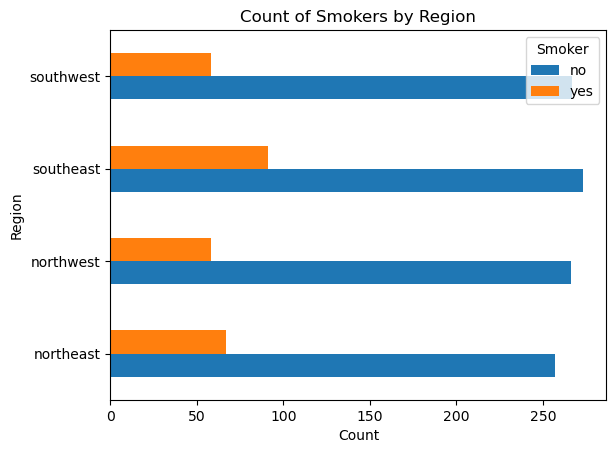

In [24]:
smokers_by_region = cleaned_df.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_by_region.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

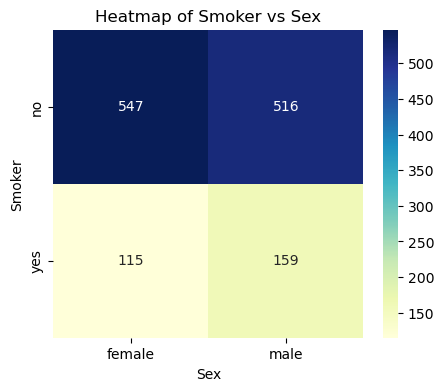

In [25]:

contingency_table = pd.crosstab(cleaned_df['smoker'], cleaned_df['sex'])

plt.figure(figsize=(5, 4))
# plt.subplot(2,2,1)
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Heatmap of Smoker vs Sex')
plt.xlabel('Sex')
plt.ylabel('Smoker')

# plt.subplot(2,2,2)
# sns.clustermap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')

# Show the plot
plt.show()


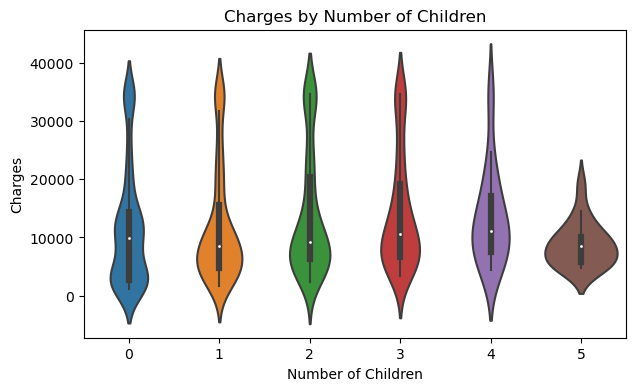

In [26]:
plt.figure(figsize=(7, 4))
sns.violinplot(x=cleaned_df['children'], y=cleaned_df['charges'])

plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.title('Charges by Number of Children')
plt.show()

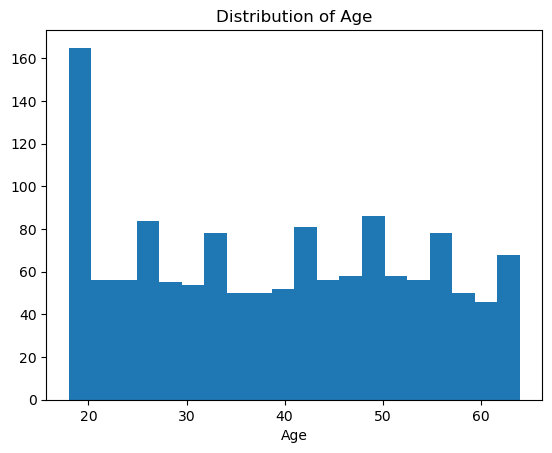

In [27]:
plt.hist(cleaned_df['age'],bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

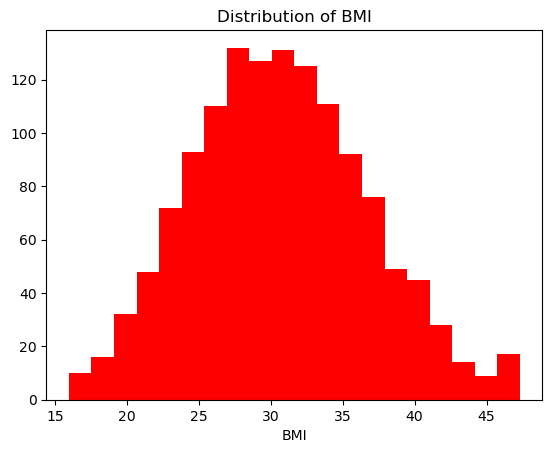

In [28]:
plt.hist(cleaned_df['bmi'],bins=20,color='r')
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

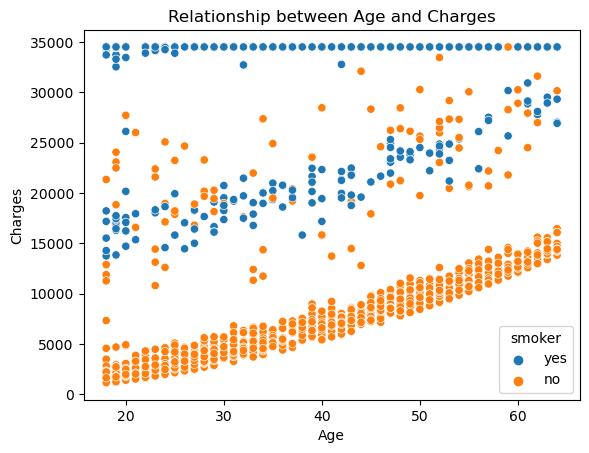

In [29]:
# cleaned_df.plot(kind='scatter', x='age', y='charges', color='g')
sns.scatterplot(x=cleaned_df['age'],y=cleaned_df['charges'],hue=cleaned_df['smoker'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

There is a linearly increasing relationship between age and insurance charges. Older people are tend to be charged more

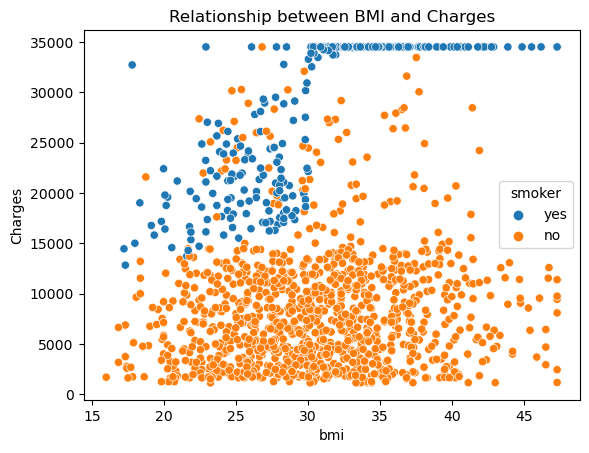

In [30]:
sns.scatterplot(x=cleaned_df['bmi'],y=cleaned_df['charges'],hue=cleaned_df['smoker'])
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.title('Relationship between BMI and Charges')
plt.show()

In both scatter plots, I can observe that smokers tend to pay higher charges.

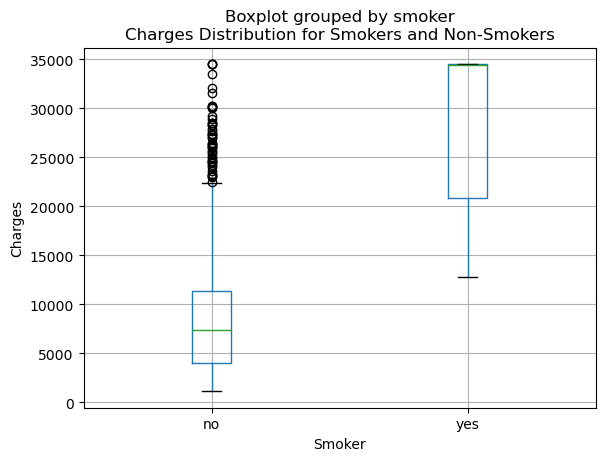

In [31]:
cleaned_df.boxplot(column='charges', by='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers and Non-Smokers')
plt.show()

**Feature Engineering**

Creating new feature such as Age groups

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
cleaned_df['age_group'] = pd.cut(cleaned_df['age'], bins=[0, 25, 40, 60, cleaned_df['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
cleaned_df.sample(5)

,age,sex,bmi,children,smoker,region,charges,age_group
597,34,female,33.250,1,no,northeast,5594.84550,Adult
1202,22,male,32.110,0,no,northwest,2055.32490,Young
906,27,male,32.585,3,no,northeast,4846.92015,Adult
703,34,female,26.410,1,no,northwest,5385.33790,Adult
691,47,male,36.200,1,no,southwest,8068.18500,Middle-aged


**Feature encoding** - Handling categorical variables

One-hot encoding for the 'region' column

In [34]:
ohe = OneHotEncoder( drop='first')  

In [35]:
 encoded_data = ohe.fit_transform(cleaned_df[['region']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out(['region']))
cleaned_df = pd.concat([cleaned_df, encoded_df], axis=1)

In [36]:
cleaned_df.sample(2)

,age,sex,bmi,children,smoker,region,charges,age_group,region_northwest,region_southeast,region_southwest
190,61.0,male,31.57,0.0,no,southeast,12557.6053,Senior,0.0,1.0,0.0
1094,50.0,female,33.70,4.0,no,southwest,11299.3430,Middle-aged,0.0,0.0,0.0


In [37]:
cleaned_df['sex'].isna().sum()


1

In [38]:
encoded_data=ohe.fit_transform(cleaned_df[['sex']])
encoded_columns = ohe.get_feature_names_out(['sex'])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns)

In [39]:
encoded_df = encoded_df.drop('sex_nan', axis=1)

In [40]:
cleaned_df = pd.concat([cleaned_df, encoded_df], axis=1)

In [41]:
cleaned_df.head(2)

,age,sex,bmi,children,smoker,region,charges,age_group,region_northwest,region_southeast,region_southwest,sex_male
0,19.0,female,27.90,0.0,yes,southwest,16884.9240,Young,0.0,0.0,1.0,0.0
1,18.0,male,33.77,1.0,no,southeast,1725.5523,Young,0.0,1.0,0.0,1.0


In [42]:
cleaned_df[['charges', 'bmi']] = cleaned_df[['charges', 'bmi']].round(1)

In [43]:
cleaned_df = cleaned_df.dropna()

In [44]:
encoded_data=ohe.fit_transform(cleaned_df[['smoker']])

In [45]:
encoded_df = pd.DataFrame(encoded_data.toarray(),columns=["smoker_encoded"])

In [46]:
cleaned_df = pd.concat([cleaned_df, encoded_df], axis=1)


In [47]:
# cleaned_df[['age']].astype(int)
cleaned_df['age'].unique()

array([19., 18., 28., 33., 32., 31., 46., 37., 60., 25., 62., 23., 56.,
       27., 52., 30., 34., 59., 63., 55., 22., 26., 35., 24., 41., 38.,
       36., 21., 48., 40., 58., 53., 43., 64., 20., 61., 44., 57., 29.,
       45., 54., 49., 47., 51., 42., 50., 39., nan])

In [48]:
cleaned_df.head(2)

,age,sex,bmi,children,smoker,region,charges,age_group,region_northwest,region_southeast,region_southwest,sex_male,smoker_encoded
0,19.0,female,27.9,0.0,yes,southwest,16884.9,Young,0.0,0.0,1.0,0.0,1.0
1,18.0,male,33.8,1.0,no,southeast,1725.6,Young,0.0,1.0,0.0,1.0,0.0


One Hot encoding for the 'smoker', 'sex' and region column

In [49]:
df_encoded = cleaned_df[[x for x in cleaned_df.columns if x not in ['smoker', 'sex']]]
df_encoded.sample(5)

,age,bmi,children,region,charges,age_group,region_northwest,region_southeast,region_southwest,sex_male,smoker_encoded
1275,57.0,23.7,0.0,southwest,10959.3,Middle-aged,0.0,0.0,0.0,0.0,0.0
172,18.0,16.0,0.0,northeast,1694.8,Young,0.0,0.0,0.0,1.0,0.0
508,24.0,25.3,0.0,northeast,3044.2,Young,0.0,0.0,0.0,0.0,0.0
1235,26.0,31.1,0.0,northwest,2699.6,Adult,0.0,0.0,0.0,0.0,0.0
230,42.0,36.2,1.0,northwest,7443.6,Middle-aged,1.0,0.0,0.0,0.0,0.0


**Correlation Analysis**

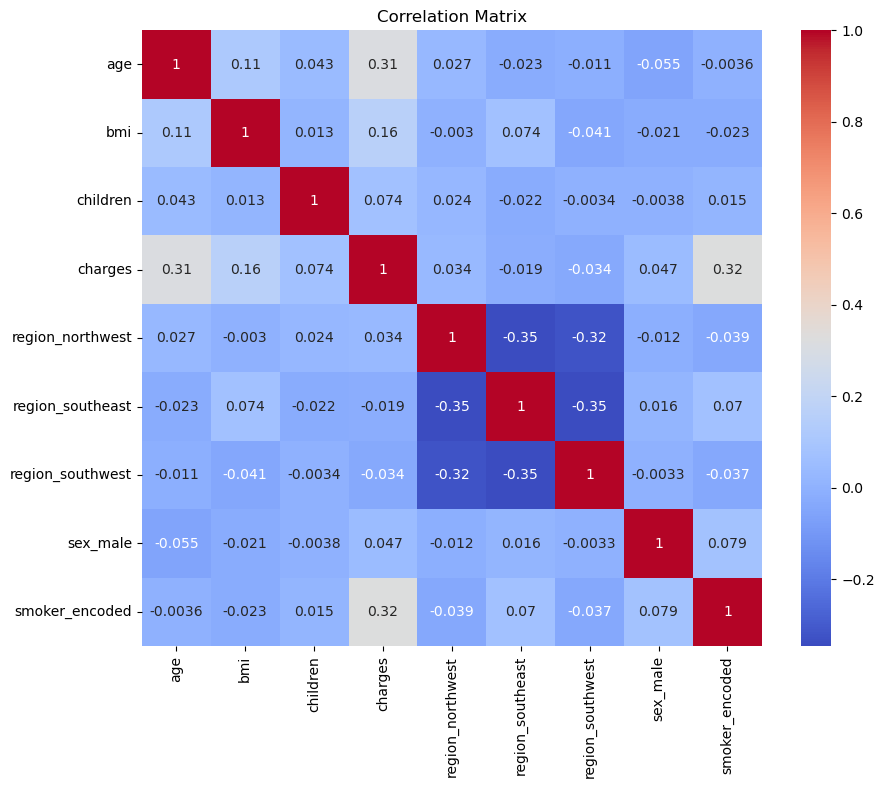

Relevant features based on correlation:
['age', 'bmi', 'smoker_encoded']


In [50]:
numr_cols = [x for x in df_encoded.columns if x not in ['age_group','region']]
corr_matrix = df_encoded[numr_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm") 
plt.title("Correlation Matrix")
plt.show()

# Identify relevant features based on correlation
threshold = 0.1
relevant_features = corr_matrix[(corr_matrix['charges'].abs() > threshold) & (corr_matrix.index != 'charges')].index.tolist() 
print("Relevant features based on correlation:") 
print(relevant_features)

 age, bmi and smoking turned out to be relevant feature based on correlation analysis

**Modelling**

In [51]:
X = df_encoded[['age','bmi', 'smoker_encoded']]
Y = df_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

In [53]:

imputer_most_frequent = SimpleImputer(strategy='most_frequent')
X_train = imputer_most_frequent.fit_transform(X_train)
X_test = imputer_most_frequent.transform(X_test)


In [54]:
Y_train_df = Y_train.to_frame()
Y_test_df = Y_test.to_frame()
Y_train = imputer_most_frequent.fit_transform(Y_train_df)
Y_test = imputer_most_frequent.transform(Y_test_df)

In [55]:
max_depth_values = [None]

for value in range(1, 10, 1):
    max_depth_values.append(value)


param_grid = {
    'criterion':['squared_error', 'absolute_error'],
    'max_depth': max_depth_values,
    'min_samples_split': max_depth_values,
    'min_samples_leaf':  max_depth_values
}
dt_model = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, Y_train)


best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Predict with the best model
dt_best_model = grid_search.best_estimator_
dt_predictions = dt_best_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(Y_test, dt_predictions)
dt_mae = mean_absolute_error(Y_test, dt_predictions)

print(f"Mean Squared Error: {dt_mse}")
print(f"Mean Absolute Error: {dt_mae}")


Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 9}
Mean Squared Error: 84665792.18938816
Mean Absolute Error: 7260.111603608656


In [56]:
# Decision Tree
dt_model = DecisionTreeRegressor(max_depth=3,min_samples_split=5,min_samples_leaf=5)
dt_model.fit(X_train, Y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(Y_test, dt_predictions)
dt_mae = mean_absolute_error(Y_test, dt_predictions)

adjusting parameters for model tuning using GridSearchCV Output

In [57]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(Y_test, dt_predictions)
dt_mae = mean_absolute_error(Y_test, dt_predictions)

Above model give better result than tuning model

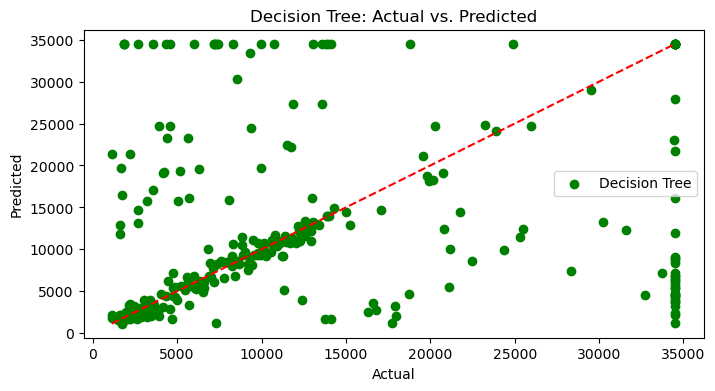

In [58]:
# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=(8, 4))
plt.scatter(Y_test, dt_predictions, color='green', label='Decision Tree')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


In [59]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5],
    'bootstrap': [True, False]
}

# Initialize the model
rf_model = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict with the best model
rf_predictions = best_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(Y_test, rf_predictions)
rf_mae = mean_absolute_error(Y_test, rf_predictions)

# Print results
print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"Mean Absolute Error: {rf_mae:.2f}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
Mean Squared Error: 90492477.81
Mean Absolute Error: 7224.30


In [60]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10,min_samples_leaf=5,min_samples_split=10,bootstrap=True)
rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(Y_test, rf_predictions)
rf_mae = mean_absolute_error(Y_test, rf_predictions)

In [61]:
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(Y_test, rf_predictions)
rf_mae = mean_absolute_error(Y_test, rf_predictions)

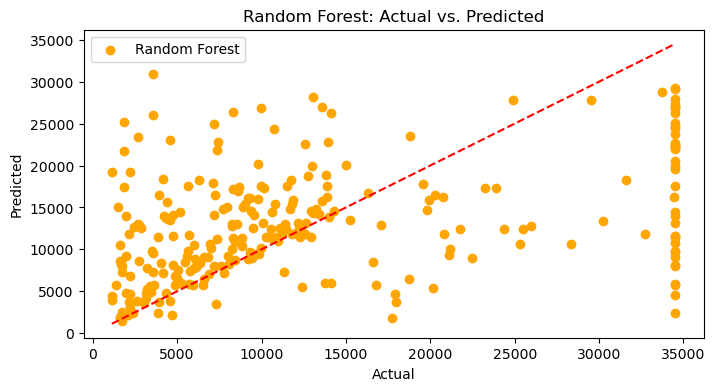

In [62]:
# Plot actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 4))
plt.scatter(Y_test, rf_predictions, color='orange', label='Random Forest')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


In [63]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb_model = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
gb_predictions = best_model.predict(X_test)
gb_mse = mean_squared_error(Y_test, gb_predictions)
gb_mae = mean_absolute_error(Y_test, gb_predictions)

print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error: {gb_mse:.2f}")
print(f"Mean Absolute Error: {gb_mae:.2f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 150}
Mean Squared Error: 86172036.22
Mean Absolute Error: 7395.22


In [64]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=150,learning_rate=0.01,max_depth=3,min_samples_split=5,min_samples_leaf=4)
gb_model.fit(X_train, Y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(Y_test, gb_predictions)
gb_mae = mean_absolute_error(Y_test, gb_predictions)

In [65]:
# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, Y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(Y_test, gb_predictions)
gb_mae = mean_absolute_error(Y_test, gb_predictions)

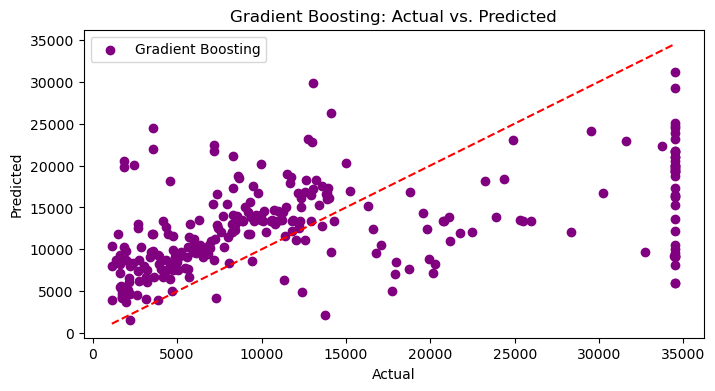

In [66]:
# Plot actual vs. predicted values for Gradient Boosting
plt.figure(figsize=(8, 4))
plt.scatter(Y_test, gb_predictions, color='purple', label='Gradient Boosting')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.title('Gradient Boosting: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [67]:
# Print the evaluation metrics
print("Decision Tree - MSE: ", dt_mse)
print("Decision Tree - MAE: ", dt_mae)
print("Random Forest - MSE: ", rf_mse)
print("Random Forest - MAE: ", rf_mae)
print("Gradient Boosting - MSE: ", gb_mse)
print("Gradient Boosting - MAE: ", gb_mae)

Decision Tree - MSE:  191006067.8361381
Decision Tree - MAE:  8596.55223880597
Random Forest - MSE:  105021899.21724491
Random Forest - MAE:  7446.275076528074
Gradient Boosting - MSE:  89895031.8637628
Gradient Boosting - MAE:  7351.056867652878


**Feature Importance**

In [68]:
# Decision Tree
print("Decision Tree:")

# Feature importances
importance = dt_model.feature_importances_ 

for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}") 

print()

# Random Forest
print("Random Forest:")

importance = rf_model.feature_importances_

for i, feature in enumerate(X.columns): 
    print(f"{feature}: {importance[i]}")

print()

# Gradient Boosting
print("Gradient Boosting:")

importance = gb_model.feature_importances_ 
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

Decision Tree:
age: 0.40200915501889756
bmi: 0.5073527394791101
smoker_encoded: 0.0906381055019924

Random Forest:
age: 0.3866346650690007
bmi: 0.5204696184304163
smoker_encoded: 0.09289571650058309

Gradient Boosting:
age: 0.4004504502707506
bmi: 0.36071532350789814
smoker_encoded: 0.23883422622135117


**Inference on sample data**

In [69]:
# Example input for prediction
new_data = pd.DataFrame({'age': [30],'bmi':[35], 'smoker_encoded': [1]})

# Decision Tree
dt_predictions = dt_model.predict(new_data)
print("Decision Tree Predictions:", dt_predictions)

# Random Forest
rf_predictions = rf_model.predict(new_data)
print("Random Forest Predictions:", rf_predictions)

# Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Decision Tree Predictions: [34524.8]
Random Forest Predictions: [22846.721]
Gradient Boosting Predictions: [23435.48783469]
